In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import paths

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
prosody_df = pd.read_csv(paths.praat_features)
prosody_df.head(10)

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,data/Audio/PP72.wav,348.936,207.001181,35.963224,11.362822,0.017873,0.000086,0.009466,0.010231,0.028397,0.160331,1.462169,0.073791,0.100186,0.158406,0.221373,567.187553,1677.305175,2605.826897,3798.854641,537.994800,1682.222813,2634.362501,3889.124583,-2.130380,-0.265613,0.868639,1117.043261,2185.926174,1745.007295,16.056233,1094.770186,15.985090
1,data/Audio/PP70.wav,395.496,223.556389,40.975198,12.055452,0.017426,0.000078,0.009249,0.010249,0.027746,0.150012,1.392363,0.067334,0.092243,0.144471,0.202001,563.470554,1771.030775,2646.934228,3787.894565,524.207432,1784.035717,2672.958334,3897.344018,-3.375824,0.637524,1.174171,1124.378862,2219.636375,1766.716694,15.872290,1107.678914,15.798802
2,data/Audio/P10.wav,426.000,114.481739,26.141558,10.727324,0.017104,0.000150,0.008680,0.009942,0.026040,0.162687,1.468174,0.068118,0.099681,0.171860,0.204353,435.276410,1471.587486,2430.757947,3286.074487,422.740558,1461.087015,2432.324651,3233.344552,-2.169249,-0.194072,-2.031950,936.867998,1887.374194,1484.587780,18.898623,942.881827,18.560120
3,data/Audio/P25.wav,382.992,189.843925,59.738564,6.363512,0.030454,0.000159,0.015865,0.016503,0.047594,0.184275,1.617519,0.085099,0.120558,0.199536,0.255298,529.202390,1653.479034,2579.042035,3624.695193,497.861930,1631.144148,2623.216633,3662.797273,3.278643,0.714228,0.071971,1054.978448,2103.754996,1671.329486,16.767085,1051.118058,16.648939
4,data/Audio/P47.wav,210.000,134.873856,36.376957,8.345053,0.017441,0.000130,0.008994,0.009639,0.026981,0.170219,1.495276,0.080863,0.098002,0.143249,0.242588,459.552242,1457.497049,2433.183331,3421.820345,434.998050,1443.451641,2420.409596,3405.182302,-1.661772,-0.757148,-1.740824,990.061417,1926.010397,1508.272093,18.590838,969.135168,18.057337
5,data/Audio/PP43.wav,166.008,110.977050,43.296184,6.031224,0.028649,0.000259,0.014822,0.015934,0.044466,0.182590,1.588855,0.087269,0.111677,0.166008,0.261808,491.522906,1545.428105,2448.726634,3593.904701,469.055981,1539.420627,2445.992096,3608.635055,2.732721,1.119257,-0.860864,1046.526358,2015.775940,1588.894267,17.641485,1013.755327,17.262548
6,data/Audio/PP24.wav,210.000,206.446803,33.610401,8.973311,0.023012,0.000111,0.012289,0.013636,0.036867,0.172904,1.534979,0.080014,0.114992,0.181491,0.240043,559.933818,1690.721969,2634.574207,3641.376329,501.332272,1708.967916,2728.276693,3673.938326,0.586202,-0.090265,0.573105,1057.535351,2153.128802,1711.866770,16.380222,1071.123518,16.337985
7,data/Audio/PP64.wav,447.000,118.453384,27.426531,8.147353,0.024275,0.000205,0.012901,0.014877,0.038703,0.183631,1.596882,0.081635,0.118951,0.194055,0.244906,459.180187,1541.484520,2432.740838,3471.996134,433.005767,1521.795473,2406.544795,3449.306411,2.043389,-0.055393,-1.490539,1005.433548,1952.663111,1529.304349,18.348432,980.387168,17.850091
8,data/Audio/PP13.wav,270.984,181.352600,40.875337,10.894524,0.027369,0.000150,0.015003,0.014799,0.045008,0.200199,1.711278,0.103447,0.139662,0.214392,0.310342,509.437085,1678.523168,2603.222286,3761.622010,505.453927,1677.856152,2623.937943,3830.469743,5.033008,-1.973436,0.537046,1108.338605,2159.429441,1708.678968,16.404939,1082.666674,16.163793
9,data/Audio/P64.wav,604.992,109.412206,26.384512,7.911593,0.022048,0.000202,0.011782,0.013070,0.035345,0.179560,1.580082,0.082300,0.113618,0.175392,0.246901,472.560195,1542.725277,2425.315704,3529.815790,444.521186,1535.566177,2391.968182,3507.549866,1.063363,-0.298715,-1.317191,1021.009560,1969.901353,1546.963489,18.132871,989.616897,17.683611


### Data Cleaning

In [4]:
prosody_df.replace('--undefined--', None, inplace=True)

In [7]:
prosody_df['InterviewID'] = prosody_df['voiceID'].apply(lambda x: x.split('/')[-1][:-4])

In [9]:
prosody_df.drop('voiceID', axis=1, inplace=True)

In [10]:
prosody_df.head(10)

,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,InterviewID
0,348.936,207.001181,35.963224,11.362822,0.017873,0.000086,0.009466,0.010231,0.028397,0.160331,1.462169,0.073791,0.100186,0.158406,0.221373,567.187553,1677.305175,2605.826897,3798.854641,537.994800,1682.222813,2634.362501,3889.124583,-2.130380,-0.265613,0.868639,1117.043261,2185.926174,1745.007295,16.056233,1094.770186,15.985090,PP72
1,395.496,223.556389,40.975198,12.055452,0.017426,0.000078,0.009249,0.010249,0.027746,0.150012,1.392363,0.067334,0.092243,0.144471,0.202001,563.470554,1771.030775,2646.934228,3787.894565,524.207432,1784.035717,2672.958334,3897.344018,-3.375824,0.637524,1.174171,1124.378862,2219.636375,1766.716694,15.872290,1107.678914,15.798802,PP70
2,426.000,114.481739,26.141558,10.727324,0.017104,0.000150,0.008680,0.009942,0.026040,0.162687,1.468174,0.068118,0.099681,0.171860,0.204353,435.276410,1471.587486,2430.757947,3286.074487,422.740558,1461.087015,2432.324651,3233.344552,-2.169249,-0.194072,-2.031950,936.867998,1887.374194,1484.587780,18.898623,942.881827,18.560120,P10
3,382.992,189.843925,59.738564,6.363512,0.030454,0.000159,0.015865,0.016503,0.047594,0.184275,1.617519,0.085099,0.120558,0.199536,0.255298,529.202390,1653.479034,2579.042035,3624.695193,497.861930,1631.144148,2623.216633,3662.797273,3.278643,0.714228,0.071971,1054.978448,2103.754996,1671.329486,16.767085,1051.118058,16.648939,P25
4,210.000,134.873856,36.376957,8.345053,0.017441,0.000130,0.008994,0.009639,0.026981,0.170219,1.495276,0.080863,0.098002,0.143249,0.242588,459.552242,1457.497049,2433.183331,3421.820345,434.998050,1443.451641,2420.409596,3405.182302,-1.661772,-0.757148,-1.740824,990.061417,1926.010397,1508.272093,18.590838,969.135168,18.057337,P47
5,166.008,110.977050,43.296184,6.031224,0.028649,0.000259,0.014822,0.015934,0.044466,0.182590,1.588855,0.087269,0.111677,0.166008,0.261808,491.522906,1545.428105,2448.726634,3593.904701,469.055981,1539.420627,2445.992096,3608.635055,2.732721,1.119257,-0.860864,1046.526358,2015.775940,1588.894267,17.641485,1013.755327,17.262548,PP43
6,210.000,206.446803,33.610401,8.973311,0.023012,0.000111,0.012289,0.013636,0.036867,0.172904,1.534979,0.080014,0.114992,0.181491,0.240043,559.933818,1690.721969,2634.574207,3641.376329,501.332272,1708.967916,2728.276693,3673.938326,0.586202,-0.090265,0.573105,1057.535351,2153.128802,1711.866770,16.380222,1071.123518,16.337985,PP24
7,447.000,118.453384,27.426531,8.147353,0.024275,0.000205,0.012901,0.014877,0.038703,0.183631,1.596882,0.081635,0.118951,0.194055,0.244906,459.180187,1541.484520,2432.740838,3471.996134,433.005767,1521.795473,2406.544795,3449.306411,2.043389,-0.055393,-1.490539,1005.433548,1952.663111,1529.304349,18.348432,980.387168,17.850091,PP64
8,270.984,181.352600,40.875337,10.894524,0.027369,0.000150,0.015003,0.014799,0.045008,0.200199,1.711278,0.103447,0.139662,0.214392,0.310342,509.437085,1678.523168,2603.222286,3761.622010,505.453927,1677.856152,2623.937943,3830.469743,5.033008,-1.973436,0.537046,1108.338605,2159.429441,1708.678968,16.404939,1082.666674,16.163793,PP13
9,604.992,109.412206,26.384512,7.911593,0.022048,0.000202,0.011782,0.013070,0.035345,0.179560,1.580082,0.082300,0.113618,0.175392,0.246901,472.560195,1542.725277,2425.315704,3529.815790,444.521186,1535.566177,2391.968182,3507.549866,1.063363,-0.298715,-1.317191,1021.009560,1969.901353,1546.963489,18.132871,989.616897,17.683611,P64


### Standardization

In [12]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your numeric features and transform them
numeric_columns = prosody_df.drop(columns=['InterviewID'])
# get all non numeric columns
numeric_columns_normalized = scaler.fit_transform(numeric_columns)
prosody_df[numeric_columns.columns] = numeric_columns_normalized


### Handle Missing Values

In [13]:
# print columns with missing values
print(prosody_df.columns[prosody_df.isna().any()].tolist())
prosody_df.fillna(prosody_df.mean(numeric_only=True), inplace=True)
print(prosody_df.columns[prosody_df.isna().any()].tolist())

[]
[]


In [14]:
prosody_df.head(10)

,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,InterviewID
0,0.008533,0.956293,-0.223514,1.027937,-0.705321,-0.904010,-0.679707,-0.707686,-0.679707,-0.652985,-0.537206,-0.505565,-0.640945,-0.578073,-0.505565,1.088013,0.639978,0.280609,1.512427,1.003446,0.616947,0.284003,1.570159,-0.703925,-0.252730,1.009328,1.435614,1.047152,1.028272,-1.019528,1.147193,-1.117935,PP72
1,0.309445,1.370196,0.306375,1.391883,-0.783926,-1.043146,-0.749751,-0.702258,-0.749751,-1.286785,-1.162783,-1.125046,-1.236357,-1.236028,-1.125046,1.004573,1.747566,0.749199,1.413503,0.673667,1.753900,0.642566,1.626551,-1.115448,0.606600,1.364346,1.604646,1.443080,1.305174,-1.245559,1.464111,-1.399992,PP70
2,0.506589,-1.356822,-1.261906,0.694011,-0.840583,0.137699,-0.933113,-0.796078,-0.933113,-0.508250,-0.483388,-1.049835,-0.678805,0.057160,-1.049835,-1.873153,-1.791060,-1.715034,-3.115838,-1.753312,-1.852495,-1.592968,-2.929023,-0.716768,-0.184658,-2.361055,-2.716108,-2.459350,-2.293355,2.473233,-2.581768,2.780906,P10
3,0.228633,0.527337,2.290126,-1.598980,1.506875,0.293608,1.384430,1.205405,1.384430,0.817812,0.854976,0.579299,0.886185,1.363841,0.579299,0.235315,0.358416,-0.024717,-0.059506,0.043510,0.046547,0.180456,0.017370,1.083337,0.679584,0.083628,0.005474,0.082049,0.088518,-0.146024,0.075504,-0.112805,P25
4,-0.889394,-0.846991,-0.179772,-0.557767,-0.781259,-0.186129,-0.831996,-0.888530,-0.831996,-0.045604,-0.240514,0.172871,-0.804674,-1.293701,0.172871,-1.328205,-1.957572,-1.687386,-1.890620,-1.460126,-2.049431,-1.703661,-1.750077,-0.549087,-0.720422,-2.022777,-1.490389,-2.005567,-1.991264,2.095024,-1.937231,2.019644,P47
5,-1.173709,-1.444444,0.551761,-1.773582,1.189537,1.933679,1.048049,1.031800,1.048049,0.714263,0.598105,0.787473,0.220401,-0.219167,0.787473,-0.610521,-0.918460,-1.510206,-0.337416,-0.645497,-0.977737,-1.465995,-0.354227,0.902952,1.064966,-1.000294,-0.189285,-0.951268,-0.962935,0.928448,-0.841776,0.816258,PP43
6,-0.889394,0.942433,-0.472265,-0.227646,0.198234,-0.491444,0.231014,0.330910,0.231014,0.119331,0.115291,0.091462,0.468936,0.511846,0.091462,0.925179,0.798529,0.608305,0.091055,0.126517,0.915612,1.156484,0.093807,0.193694,-0.085887,0.665928,0.064392,0.661946,0.605568,-0.621406,0.566651,-0.583618,PP24
7,0.642309,-1.257525,-1.126053,-0.661650,0.420368,1.052067,0.428399,0.709440,0.428399,0.778218,0.670035,0.246981,0.765693,1.105072,0.246981,-1.336557,-0.965062,-1.692431,-1.437742,-1.507780,-1.174559,-1.832468,-1.447350,0.675181,-0.052706,-1.731955,-1.136173,-1.692530,-1.722999,1.797153,-1.660987,1.705854,PP64
8,-0.495261,0.315043,0.295818,0.781867,0.964472,0.141815,1.106339,0.685709,1.106339,1.795908,1.695211,2.339516,2.318194,2.065261,2.339516,-0.208381,0.654371,0.250919,1.176372,0.225103,0.568184,0.187157,1.167739,1.663019,-1.877712,0.624028,1.235036,0.735947,0.564908,-0.591034,0.850043,-0.847361,PP13
9,1.663393,-1.483567,-1.236220,-0.785531,0.028709,0.993702,0.067389,0.158189,0.067389,0.528166,0.519486,0.310766,0.365959,0.223889,0.310766,-1.036200,-0.950400,-1.777071,-0.915871,-1.232343,-1.020780,-1.967888,-1.047753,0.351359,-0.284226,-1.530530,-0.777260,-1.490066,-1.497759,1.532268,-1.434391,1.453787,P64


In [15]:
prosody_df.to_csv('pp_data/prosodical_features_2.csv', index=False)

### PCA For Dimensionality Reduction

Total number of features before PCA: 32
Total number of features after PCA: 6


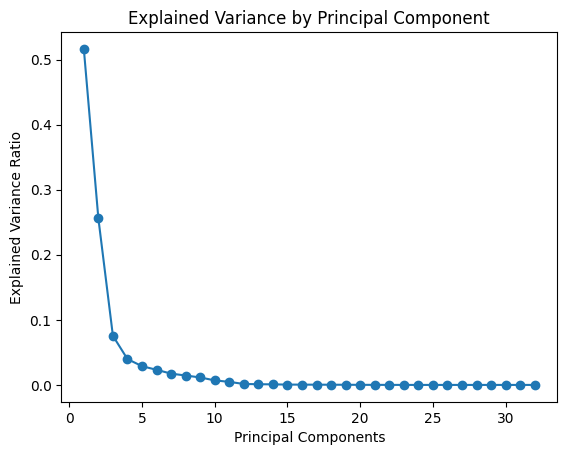

In [16]:
# Create a PCA instance
pca = PCA()

# Fit PCA to the standardized data
numeric_columns = prosody_df.drop(columns=['InterviewID'])
pca.fit(numeric_columns)

# Determine the optimal number of components (optional)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
n_components = len(cumulative_variance[cumulative_variance <= 0.95])  # Set your desired explained variance threshold (e.g., 95%)

# Fit PCA again with the optimal number of components
print(f"Total number of features before PCA: {len(numeric_columns.columns)}")
print(f"Total number of features after PCA: {n_components}")
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(numeric_columns)

# Visualize the explained variance by each principal component (optional)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()

In [17]:
pca_df = pd.DataFrame(X_pca)

num_components = X_pca.shape[1]
column_names = [f'Prosody_PC{i}' for i in range(1, num_components + 1)]
pca_df.columns = column_names

pca_df['InterviewID'] = prosody_df['InterviewID']

In [18]:
pca_df.head(10)

,Prosody_PC1,Prosody_PC2,Prosody_PC3,Prosody_PC4,Prosody_PC5,Prosody_PC6,InterviewID
0,-4.570700,0.474499,-0.476010,0.996766,-0.058789,0.260662,PP72
1,-6.380571,0.466188,1.035140,1.141487,-0.361794,-0.184787,PP70
2,5.716434,-7.393424,0.265089,-0.087549,-1.282737,-1.394737,P10
3,1.789183,3.441869,1.384138,-1.339614,1.042728,-0.067736,P25
4,4.727274,-5.336149,-0.289992,-0.056613,-1.904613,0.941887,P47
5,4.794323,0.575509,1.421068,-0.455340,-0.194326,2.110285,PP43
6,-1.608271,1.767747,-0.473332,-1.160446,-0.333296,-0.161195,PP24
7,6.216662,-2.102182,-0.095969,0.373740,0.071154,-0.259428,PP64
8,1.017511,5.699414,-3.134303,0.682218,-0.240090,-0.833040,PP13
9,5.074973,-2.602704,-0.356617,1.106337,0.938416,0.081155,P64


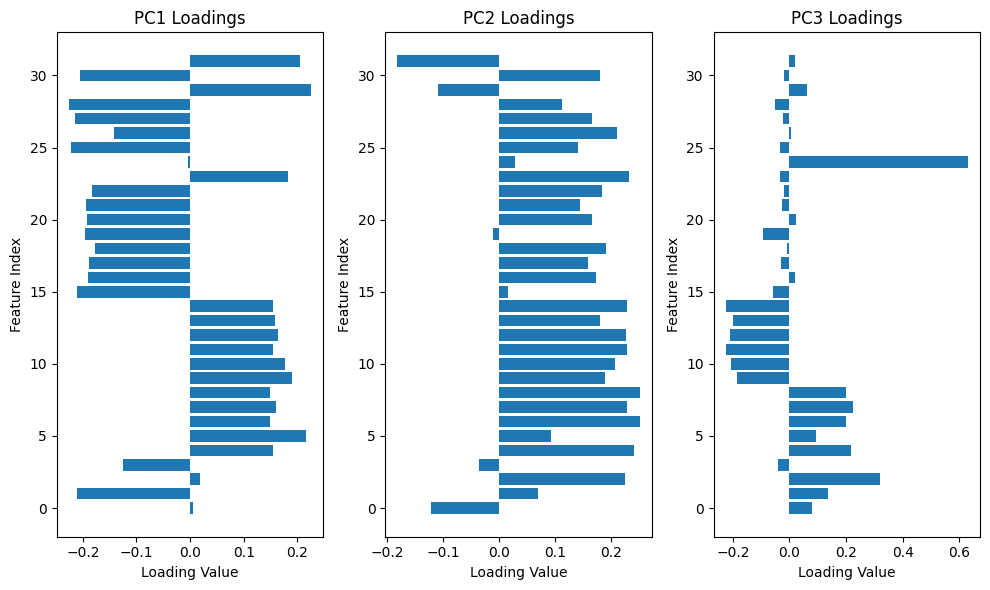

In [19]:
# Access the loadings
loadings = pca.components_

# Visualize the loadings for the first few PCs
n_components_to_visualize = 3  # Change this number as needed
plt.figure(figsize=(10, 6))
for i in range(n_components_to_visualize):
    plt.subplot(1, n_components_to_visualize, i + 1)
    plt.barh(range(len(loadings[i])), loadings[i])
    plt.title(f'PC{i + 1} Loadings')
    plt.xlabel('Loading Value')
    plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()

In [20]:
# pca_df.to_csv('pp_data/prosodical_features.csv', index=False)